<a href="https://colab.research.google.com/github/Rosie-Ping/HyperMarket/blob/main/HyperMarket_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/Shared drives/MSBA 446 Second Half/2-2B/OUTLET_TRAIN.csv')
test_df = pd.read_csv('/content/drive/Shared drives/MSBA 446 Second Half/2-2B/OUTLET_TESTC.csv')

#Data Exploration

有 missing value

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,RNUM,GROUP
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.139644,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.431302,1
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.612179,1
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800,0.290753,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.155732,1


In [ ]:
train_df.dtypes

Item_Identifier               object
Item_Weight                   object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
RNUM                         float64
GROUP                          int64
dtype: object

In [ ]:
train_df = train_df.replace(' ',np.nan)
test_df = test_df.replace(' ',np.nan)

In [ ]:
print(train_df.isna().sum())
print(test_df.isna().sum())

Item_Identifier                 0
Item_Weight                  1106
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1792
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
RNUM                            0
GROUP                           0
dtype: int64
Item_Identifier                 0
Item_Weight                   357
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                   618
Outlet_Location_Type            0
Outlet_Type                     0
GROUP                           0
Item_Outlet_Sales            2133
dtype: int64


In [ ]:
#separate numerical and categorical features
numeric_features = train_df.select_dtypes(include=[np.number])
print(numeric_features.dtypes)
categorical_features = train_df.select_dtypes(include=[object])
print(categorical_features.dtypes)

Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
RNUM                         float64
GROUP                          int64
dtype: object
Item_Identifier         object
Item_Weight             object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


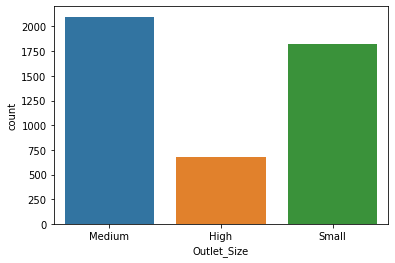

In [ ]:
sns.countplot(train_df['Outlet_Size'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


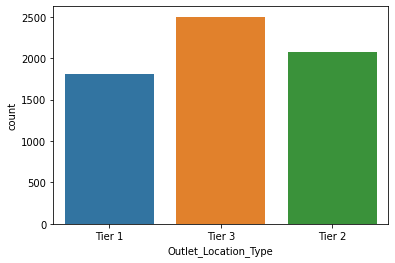

In [ ]:
sns.countplot(train_df['Outlet_Location_Type'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


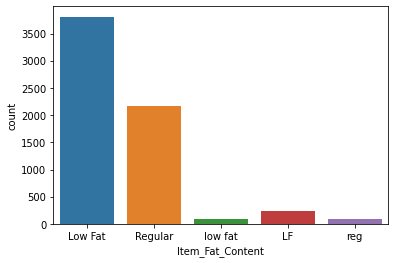

In [ ]:
sns.countplot(train_df['Item_Fat_Content'])

In [ ]:
na_weight = train_df[train_df['Item_Weight'].isna()]
na_weight.groupby('Outlet_Identifier').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,RNUM,GROUP
Outlet_Identifier,,,,,,,,,,,,,
OUT019,418,0,418,418,418,418,418,418,418,418,418,418,418
OUT027,688,0,688,688,688,688,688,688,688,688,688,688,688


In [ ]:
print(len(train_df[train_df['Outlet_Identifier']=='OUT019']))
print(len(train_df[train_df['Outlet_Identifier']=='OUT027']))

418
688


In [ ]:
na_outletsize = train_df[train_df['Outlet_Size'].isna()]
na_outletsize.groupby('Outlet_Identifier').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,RNUM,GROUP
Outlet_Identifier,,,,,,,,,,,,,
OUT010,419,419,419,419,419,419,419,0,419,419,419,419,419
OUT017,688,688,688,688,688,688,688,0,688,688,688,688,688
OUT045,685,685,685,685,685,685,685,0,685,685,685,685,685


In [ ]:
print(len(train_df[train_df['Outlet_Identifier']=='OUT010']))
print(len(train_df[train_df['Outlet_Identifier']=='OUT017']))
print(len(train_df[train_df['Outlet_Identifier']=='OUT045']))

419
688
685


In [ ]:
train_df.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year','Outlet_Location_Type']).size()

Outlet_Identifier  Outlet_Type        Outlet_Establishment_Year  Outlet_Location_Type
OUT010             Grocery Store      1998                       Tier 3                  419
OUT013             Supermarket Type1  1987                       Tier 3                  678
OUT017             Supermarket Type1  2007                       Tier 2                  688
OUT018             Supermarket Type2  2009                       Tier 3                  715
OUT019             Grocery Store      1985                       Tier 1                  418
OUT027             Supermarket Type3  1985                       Tier 3                  688
OUT035             Supermarket Type1  2004                       Tier 2                  703
OUT045             Supermarket Type1  2002                       Tier 2                  685
OUT046             Supermarket Type1  1997                       Tier 1                  701
OUT049             Supermarket Type1  1999                       Tier 1      

##Match train and test dataset

In [ ]:
print(np.sort(train_df['Outlet_Identifier'].unique()))
print(np.sort(test_df['Outlet_Identifier'].unique()))

['OUT010' 'OUT013' 'OUT017' 'OUT018' 'OUT019' 'OUT027' 'OUT035' 'OUT045'
 'OUT046' 'OUT049']
['OUT010' 'OUT013' 'OUT017' 'OUT018' 'OUT019' 'OUT027' 'OUT035' 'OUT045'
 'OUT046' 'OUT049']


In [ ]:
train_id_unq = train_df['Item_Identifier'].unique()
test_id_unq = test_df['Item_Identifier'].unique()

In [ ]:
len(np.intersect1d(train_id_unq,test_id_unq))

1199

In [ ]:
len(np.setdiff1d(train_id_unq,test_id_unq))

356

In [ ]:
#in test, not in train
len(np.setdiff1d(test_id_unq,train_id_unq))

4

In [ ]:
for i in categorical_features.columns:
  print(i)
  print(np.setdiff1d(train_df[i].unique(),test_df[i].unique()))

Item_Identifier
['DRC25' 'DRD12' 'DRE01' 'DRE37' 'DRF51' 'DRG11' 'DRG23' 'DRG27' 'DRH03'
 'DRH15' 'DRH23' 'DRH37' 'DRH59' 'DRI01' 'DRI13' 'DRI23' 'DRI25' 'DRI51'
 'DRI59' 'DRJ37' 'DRK01' 'DRK11' 'DRK37' 'DRM49' 'DRM59' 'DRN11' 'DRN35'
 'DRN36' 'DRN37' 'DRN47' 'DRN59' 'DRO59' 'DRZ11' 'DRZ24' 'FDA03' 'FDA16'
 'FDA20' 'FDA22' 'FDA25' 'FDA31' 'FDA35' 'FDA37' 'FDA51' 'FDB03' 'FDB04'
 'FDB08' 'FDB10' 'FDB14' 'FDB20' 'FDB22' 'FDB28' 'FDB33' 'FDB36' 'FDB38'
 'FDB50' 'FDC20' 'FDC22' 'FDC23' 'FDC33' 'FDC38' 'FDC56' 'FDD02' 'FDD10'
 'FDD20' 'FDD22' 'FDD28' 'FDD34' 'FDD35' 'FDD44' 'FDD45' 'FDD53' 'FDD56'
 'FDE09' 'FDE10' 'FDE20' 'FDE21' 'FDE35' 'FDE38' 'FDE39' 'FDE40' 'FDE45'
 'FDE51' 'FDE52' 'FDF17' 'FDF29' 'FDF34' 'FDF35' 'FDF38' 'FDF39' 'FDF50'
 'FDG14' 'FDG21' 'FDG22' 'FDG38' 'FDG57' 'FDG59' 'FDH12' 'FDH20' 'FDH21'
 'FDH24' 'FDH31' 'FDH35' 'FDH38' 'FDH46' 'FDH53' 'FDH60' 'FDI05' 'FDI09'
 'FDI27' 'FDI32' 'FDI35' 'FDI36' 'FDI38' 'FDI44' 'FDI46' 'FDI56' 'FDJ07'
 'FDJ15' 'FDJ26' 'FDJ33' 'FDJ38' 'F

In [ ]:
s = np.array(train_df['Item_Identifier'])
k = []
for i in s:
  k.append(i[0:2])
#print(k)

train_df['Item_carcode'] = k
train_df.groupby(['Item_carcode','Item_Type']).size()

Item_carcode  Item_Type            
DR            Dairy                    102
              Hard Drinks              167
              Soft Drinks              328
FD            Baking Goods             495
              Breads                   184
              Breakfast                 84
              Canned                   501
              Dairy                    400
              Frozen Foods             645
              Fruits and Vegetables    926
              Meat                     318
              Seafood                   50
              Snack Foods              862
              Starchy Foods            116
NC            Health and Hygiene       405
              Household                683
              Others                   124
dtype: int64

In [ ]:
#remove NA
#train_df = train_df.drop(columns=['Item_Weight','Outlet_Size'])

In [ ]:
train_df.dtypes

Item_Identifier               object
Item_Weight                   object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
RNUM                         float64
GROUP                          int64
Item_carcode                  object
dtype: object

In [ ]:
categorical_features.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
data.describe()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,RNUM
count,6390.000000,6390.000000,6390.000000,6390.000000
mean,0.066200,141.213306,2183.682296,0.375272
std,0.052097,62.427149,1719.242009,0.217642
min,0.000000,31.290000,33.290000,0.000015
25%,0.026815,93.719900,825.758450,0.186405
50%,0.053564,143.397000,1789.670400,0.373493
75%,0.094458,186.091750,3111.949200,0.565914
max,0.328391,266.888400,13086.964800,0.749965


In [ ]:
numeric_features.corr()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,RNUM
Item_Visibility,1.000000,-0.004552,-0.140577,-0.005946
Item_MRP,-0.004552,1.000000,0.567055,0.015612
Item_Outlet_Sales,-0.140577,0.567055,1.000000,-0.001563
RNUM,-0.005946,0.015612,-0.001563,1.000000


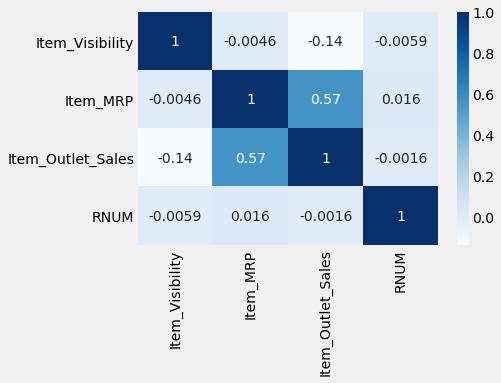

In [ ]:
sns.heatmap(numeric_features.corr(),cmap='Blues',annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

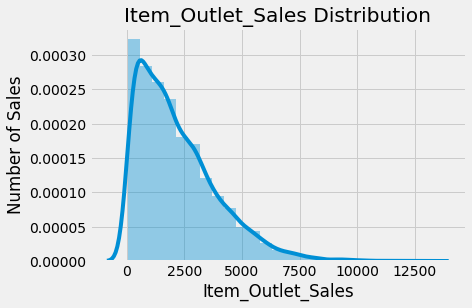

In [ ]:
sns.distplot(data.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f938f6d2b70>,
      dtype=object)

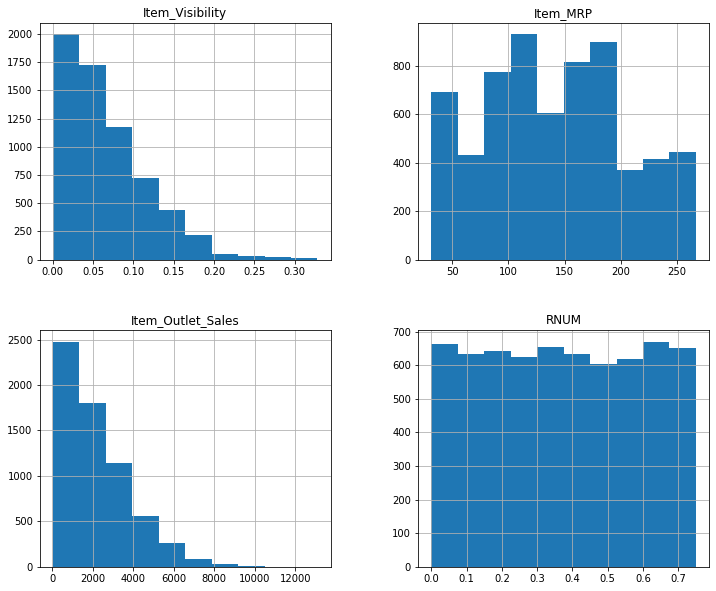

In [ ]:
data.hist(figsize=(12,10))

In [ ]:
group_item_type = train_df.groupby('Item_Type')
group_item_type['Item_Outlet_Sales'].mean().sort_values()


Item_Type
Others                   1897.111190
Baking Goods             1964.369595
Health and Hygiene       2013.615929
Soft Drinks              2043.656861
Hard Drinks              2048.770257
Breakfast                2149.408481
Meat                     2151.097208
Frozen Foods             2179.237722
Canned                   2183.062516
Breads                   2223.493377
Snack Foods              2258.300913
Household                2258.364355
Fruits and Vegetables    2279.086606
Dairy                    2295.812356
Starchy Foods            2345.464169
Seafood                  2419.557148
Name: Item_Outlet_Sales, dtype: float64

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

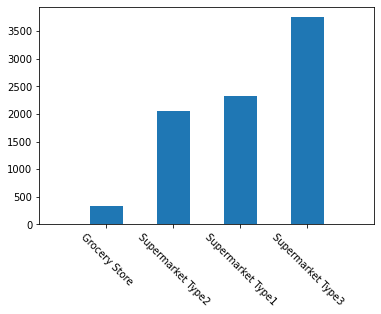

In [ ]:
group_outlet_type = data.groupby('Outlet_Type')
ot = group_outlet_type['Item_Outlet_Sales'].mean().sort_values()
plt.bar(ot.index,ot.values, width = 0.5)
plt.xlim(-1,4)
plt.xticks(rotation=-45)

#Feature Engineering

In [ ]:
print(numeric_features.dtypes)
print(categorical_features.dtypes)

Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
RNUM                         float64
GROUP                          int64
dtype: object
Item_Identifier         object
Item_Weight             object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object


In [ ]:
#Item_weight type
train_df['Item_Weight'] = train_df['Item_Weight'].astype(float)
test_df['Item_Weight'] = test_df['Item_Weight'].astype(float)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6390 non-null   object 
 1   Item_Weight                5284 non-null   float64
 2   Item_Fat_Content           6390 non-null   object 
 3   Item_Visibility            6390 non-null   float64
 4   Item_Type                  6390 non-null   object 
 5   Item_MRP                   6390 non-null   float64
 6   Outlet_Identifier          6390 non-null   object 
 7   Outlet_Establishment_Year  6390 non-null   int64  
 8   Outlet_Size                4598 non-null   object 
 9   Outlet_Location_Type       6390 non-null   object 
 10  Outlet_Type                6390 non-null   object 
 11  Item_Outlet_Sales          6390 non-null   float64
 12  RNUM                       6390 non-null   float64
 13  GROUP                      6390 non-null   int64

##Missing Value

In [ ]:
train_df = train_df.replace(' ',np.nan)
test_df = test_df.replace(' ',np.nan)
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1106
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1792
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
RNUM                            0
GROUP                           0
dtype: int64

In [ ]:
#Drop Outlet_Size
train_df = train_df.drop(columns = 'Outlet_Size')
test_df = test_df.drop(columns = 'Outlet_Size')

In [ ]:
train_df[train_df['Item_Identifier']=='DRA24']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,RNUM,GROUP
2167,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Tier 1,Grocery Store,491.3604,0.636099,1
3099,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,Tier 3,Grocery Store,327.5736,0.203904,1
3328,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Tier 3,Supermarket Type3,4913.6040,0.019935,1
3685,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Tier 2,Supermarket Type1,3439.5228,0.502072,1
5144,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Tier 1,Supermarket Type1,982.7208,0.384164,1


In [ ]:
#replace Item_Weight NA with the value with same Item_Identifier
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
#train_df['Item_Weight']= train_df.groupby(['Item_Identifier'])['Item_Weight'].fillna(method='bfill').sort_index()
#test_df['Item_Weight']= test_df.groupby(['Item_Identifier'])['Item_Weight'].fillna(method='bfill').sort_index()

In [ ]:
train_df.isna().sum()

Item_Identifier               0
Item_Weight                  14
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Location_Type          0
Outlet_Type                   0
Item_Outlet_Sales             0
RNUM                          0
GROUP                         0
dtype: int64

Missing value for Item_Weight goes down from 1106 to 14 after replaced by the value with same Item_Identifier. The rest missing value will be replaced by the mean value of Item_Weight in each Item_Type.

In [ ]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df.groupby('Item_Type')['Item_Weight'].transform('mean'))
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [ ]:
train_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
RNUM                         0
GROUP                        0
dtype: int64

In [ ]:
#Outlet_Establishment_Year
train_df['Outlet_Years'] = 2020 - train_df['Outlet_Establishment_Year']
test_df['Outlet_Years'] = 2020 - test_df['Outlet_Establishment_Year']
train_df['Outlet_Years'].unique()
train_df.drop(columns = 'Outlet_Establishment_Year')
train_df.drop(columns = 'Outlet_Establishment_Year')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,RNUM,GROUP,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1,3735.1380,0.139644,1,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Tier 3,Supermarket Type2,443.4228,0.431302,1,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Tier 1,Supermarket Type1,2097.2700,0.612179,1,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Tier 3,Grocery Store,732.3800,0.290753,1,22
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,Tier 3,Supermarket Type1,994.7052,0.155732,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,Tier 3,Supermarket Type1,2778.3834,0.399665,1,33
6386,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Tier 2,Supermarket Type1,549.2850,0.511642,1,18
6387,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Tier 2,Supermarket Type1,1193.1136,0.478188,1,16
6388,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Tier 3,Supermarket Type2,1845.5976,0.061866,1,11


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


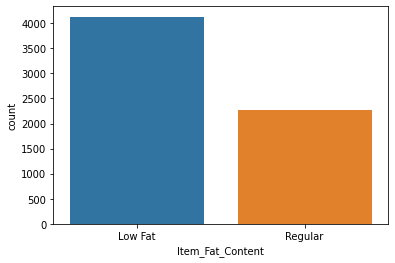

In [ ]:
Fat_mapping = {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace(Fat_mapping)
sns.countplot(train_df['Item_Fat_Content'])

In [ ]:
categorical_features.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
pd.concat([train_df['Item_Identifier'], test_df['Item_Identifier']], axis=0, sort=False)[2132]

2132    171
2132    389
Name: Item_Identifier, dtype: int64

##Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = 'Item_Identifier'
encoder.fit(pd.concat([train_df[col], test_df[col]], axis=0, sort=False))
train_df[col] = encoder.transform(train_df[col])
test_df[col] = encoder.transform(test_df[col])

In [ ]:
train_df[col]

0        156
1          8
2        662
3       1121
4       1297
        ... 
6385     370
6386     897
6387    1357
6388     681
6389      50
Name: Item_Identifier, Length: 6390, dtype: int64

In [ ]:
'''
#labelEcode
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# fit and transform feature x2
for col in categorical_features.columns.astype('object'):
    print(col)
    encoder = LabelEncoder()
    encoder.fit(pd.concat([train_df[col], test_df[col]], axis=0, sort=False))
    train_df[col] = encoder.transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])
    
print(train_df.head(), '\n')
print(test_df.head(), '\n')

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Location_Type
Outlet_Type
   Item_Identifier  Item_Weight  ...  GROUP  Outlet_Years
0              156         9.30  ...      1            21
1                8         5.92  ...      1            11
2              662        17.50  ...      1            21
3             1121        19.20  ...      1            22
4             1297         8.93  ...      1            33

[5 rows x 14 columns] 

   Item_Identifier  Item_Weight  ...  Item_Outlet_Sales  Outlet_Years
0              767         9.00  ...                NaN            23
1             1294        13.00  ...                NaN            13
2             1032        20.20  ...                NaN            35
3              567         9.80  ...                NaN            33
4              641         6.42  ...                NaN            22

[5 rows x 13 columns] 



In [ ]:
train_df[categorical_features.columns].head()

KeyError: ignored

Since there are too many levels in 'Item_Identifier', we will not convert it into dummy variables and will not put it into model if the model cannot deal with categorical variables.

In [ ]:
train_df = pd.get_dummies(train_df, columns =['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Location_Type','Outlet_Type']
               ,drop_first = True)
test_df = pd.get_dummies(test_df, columns =['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Location_Type','Outlet_Type']
               ,drop_first = True)

In [ ]:
test_df.dtypes

Item_Identifier                      int64
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
GROUP                                int64
Item_Outlet_Sales                  float64
Outlet_Years                         int64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_S

In [ ]:
train_df.to_csv("/content/drive/Shared drives/MSBA 446 Second Half/2-2B/train_modified.csv",index=False)
test_df.to_csv("/content/drive/Shared drives/MSBA 446 Second Half/2-2B/test_modified.csv",index=False)